In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
store=pd.read_csv('SampleSuperstore.csv')
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
store.duplicated().sum()

17

In [6]:
store.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [7]:
store.shape

(9994, 13)

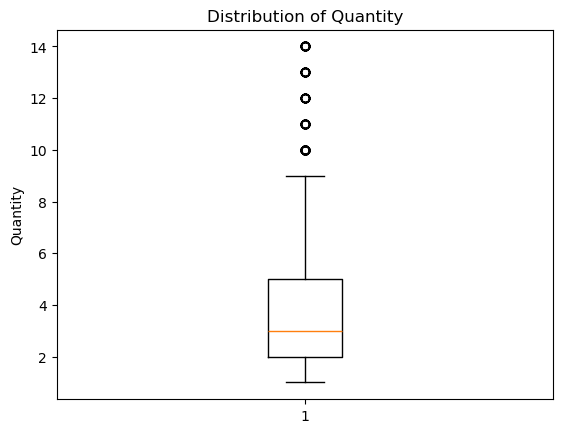

In [8]:
plt.boxplot(store['Quantity'])
plt.title('Distribution of Quantity')
plt.ylabel('Quantity')
plt.show()

In [9]:
# Calculate Q1 and Q3
Q1 = store['Quantity'].quantile(0.25)
Q3 = store['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
store_cleaned = store[(store['Quantity'] >= lower_bound) & (store['Quantity'] <= upper_bound)]
print("New dataframe:")
store_cleaned

New dataframe:


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


<Axes: ylabel='Quantity'>

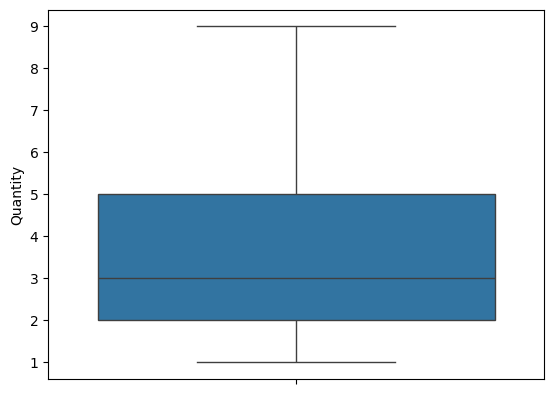

In [10]:
sns.boxplot(store_cleaned['Quantity'])

<Axes: ylabel='Sales'>

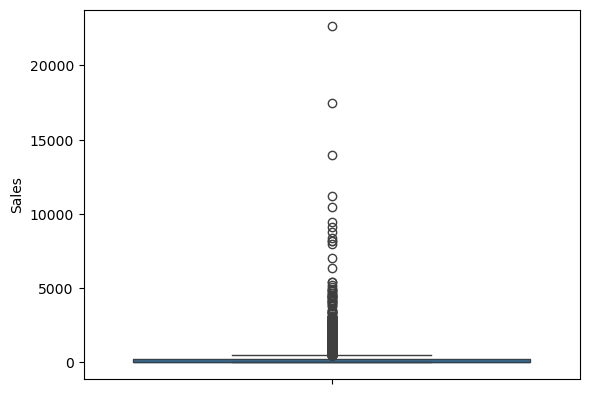

In [11]:
sns.boxplot(store_cleaned['Sales'])

In [12]:
# Calculate Q1 and Q3
Q1 = store['Sales'].quantile(0.25)
Q3 = store['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
store_cleaned = store[(store['Sales'] >= lower_bound) & (store['Sales'] <= upper_bound)]


<Axes: ylabel='Sales'>

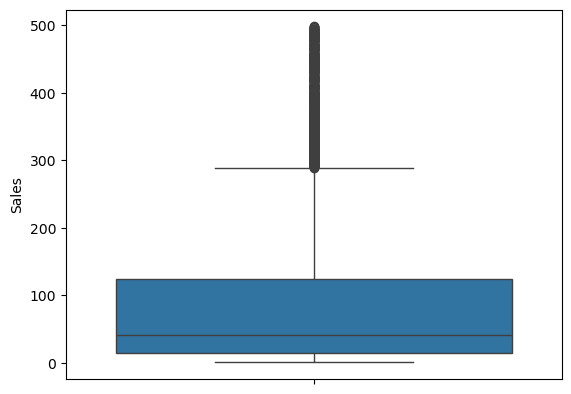

In [13]:
sns.boxplot(store_cleaned['Sales'])

<Axes: ylabel='Profit'>

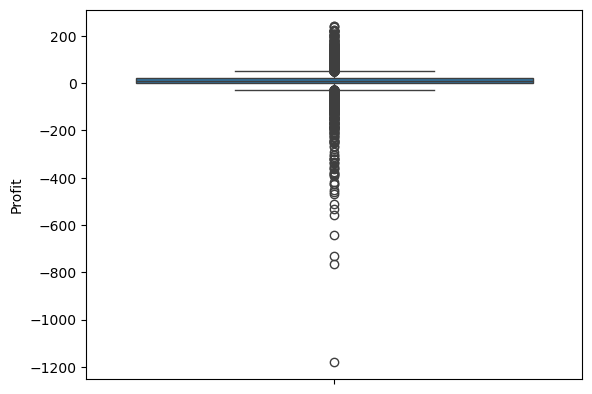

In [14]:
sns.boxplot(store_cleaned['Profit'])

In [15]:
# Calculate Q1 and Q3
Q1 = store['Profit'].quantile(0.25)
Q3 = store['Profit'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier rangeProfit
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
store_cleaned = store[(store['Profit'] >= lower_bound) & (store['Profit'] <= upper_bound)]


<Axes: ylabel='Profit'>

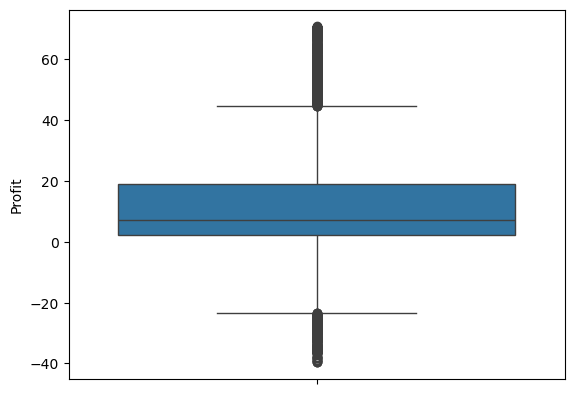

In [16]:
sns.boxplot(store_cleaned['Profit'])

<Axes: ylabel='Discount'>

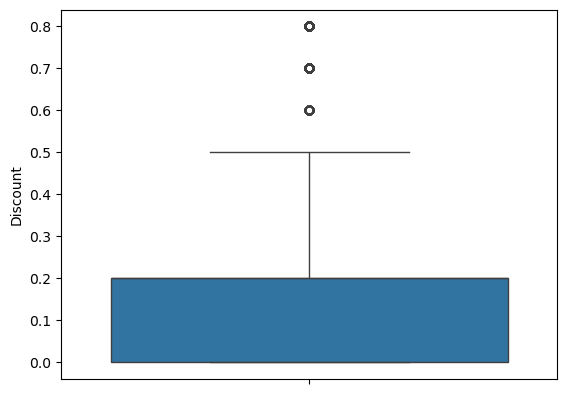

In [17]:
sns.boxplot(store_cleaned['Discount'])

In [18]:
# Calculate Q1 and Q3
Q1 = store['Discount'].quantile(0.25)
Q3 = store['Discount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
store_cleaned = store[(store['Discount'] >= lower_bound) & (store['Discount'] <= upper_bound)]


<Axes: ylabel='Discount'>

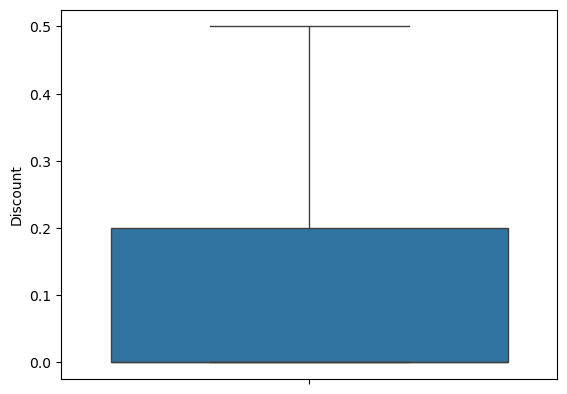

In [19]:
sns.boxplot(store_cleaned['Discount'])

In [20]:
store_cleaned['Ship Mode'].value_counts()

Ship Mode
Standard Class    5429
Second Class      1816
First Class       1394
Same Day           499
Name: count, dtype: int64

In [21]:
store_cleaned['Segment'].value_counts()

Segment
Consumer       4740
Corporate      2759
Home Office    1639
Name: count, dtype: int64

In [22]:
store_cleaned['City'].value_counts().head(10)

City
New York City    915
Los Angeles      747
San Francisco    510
Philadelphia     443
Seattle          428
Houston          263
Chicago          215
Columbus         202
San Diego        170
Springfield      151
Name: count, dtype: int64

In [23]:
store_cleaned['State'].value_counts().head(10)

State
California      2001
New York        1128
Texas            704
Washington       506
Pennsylvania     482
Ohio             388
Illinois         335
Florida          316
Michigan         255
Virginia         224
Name: count, dtype: int64

In [24]:
store_cleaned['Region'].value_counts()

Region
West       3103
East       2662
Central    1885
South      1488
Name: count, dtype: int64

In [25]:
store_cleaned['Category'].value_counts()

Category
Office Supplies    5346
Furniture          1968
Technology         1824
Name: count, dtype: int64

In [26]:
store_cleaned.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [27]:
ship_seg=pd.crosstab(store_cleaned['Ship Mode'],store_cleaned['Segment'])
ship_seg

Segment,Consumer,Corporate,Home Office
Ship Mode,,,
First Class,698,436,260
Same Day,286,108,105
Second Class,950,570,296
Standard Class,2806,1645,978


In [28]:
ship_cat=pd.crosstab(store_cleaned['Ship Mode'],store_cleaned['Category'])
ship_cat

Category,Furniture,Office Supplies,Technology
Ship Mode,,,
First Class,306,796,292
Same Day,109,294,96
Second Class,391,1061,364
Standard Class,1162,3195,1072


In [29]:
ship_subcat=pd.crosstab(store_cleaned['Ship Mode'],store_cleaned['Sub-Category'])
ship_subcat

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Ship Mode,,,,,,,,,,,,,,,,,
First Class,128,71,112,130,45,85,12,32,30,129,60,14,217,138,119,25,47
Same Day,41,20,36,45,7,39,5,14,14,42,21,8,81,42,52,11,21
Second Class,162,67,155,184,45,134,15,53,37,151,62,12,289,175,171,43,61
Standard Class,444,241,493,551,116,359,36,155,136,497,221,58,783,534,504,111,190


In [30]:
Sales_By_Sub_Cat=store_cleaned.groupby('Sub-Category')['Sales'].sum().reset_index()
Sales_By_Sub_Cat

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,104149.6270
2,Art,27118.7920
3,Binders,167272.1200
4,Bookcases,112420.6143
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,85060.4640


In [31]:
Sales_By_Cat=store_cleaned.groupby('Category')['Sales'].sum().reset_index()
Sales_By_Cat

,Category,Sales
0,Furniture,732895.7133
1,Office Supplies,679523.8850
2,Technology,820552.5240


In [32]:
Sales_By_Sub_Cat=store_cleaned.groupby('Ship Mode')['Sales'].sum().reset_index()
Sales_By_Sub_Cat

,Ship Mode,Sales
0,First Class,3.385824e+05
1,Same Day,1.265539e+05
2,Second Class,4.514961e+05
3,Standard Class,1.316340e+06


In [33]:
store_cleaned.to_csv('Cleaned Sample Super Store dataset.csv')

In [34]:
store_cleaned.shape

(9138, 13)